In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import requests
from io import StringIO

# Visualization (Static)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization (Interactive)
import plotly.express as px

# Machine Learning & Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Import Data 

In [2]:
# 1) All variables and countries from the master data
final_df_long= pd.read_csv("https://raw.githubusercontent.com/AyaanTigdikar/Capstone/refs/heads/main/workingdata/master_data_long.csv")
final_df_long = final_df_long.drop(columns=['Unnamed: 0'], errors='ignore')

# 2) Clusters list from Leo
clusters_list = pd.read_csv('https://raw.githubusercontent.com/AyaanTigdikar/Capstone/refs/heads/main/workingdata/clusters_list.csv')

# Cluster variations across time 

### Pre-processing 

In [ ]:
final_df_long[final_df_long['Variable'] == 'Economic Complexity Index'].isna().sum()

Country Code     0
Year             0
Variable         0
Value            0
Country Name    25
dtype: int64

In [4]:
windows = {
    3: ([1995, 1996, 1997], [2017, 2018, 2019]),
    5: ([1995, 1996, 1997, 1998, 1999], [2015, 2016, 2017, 2018, 2019]),
    7: ([1995, 1996, 1997, 1998, 1999, 2000, 2001], 
        [2013, 2014, 2015, 2016, 2017, 2018, 2019])
}

results = {}

for k, (start_years, end_years) in windows.items():

    df_k = final_df_long[
        final_df_long['Year'].isin(start_years + end_years)
    ].copy()

    pivot = df_k.pivot_table(
        index=['Country Code', 'Variable'],
        columns='Year',
        values='Value'
    )

    # Averages
    pivot['avg_start'] = pivot[start_years].mean(axis=1)
    pivot['avg_end']   = pivot[end_years].mean(axis=1)

    # Build variable-specific outcome
    pivot['value_out'] = pivot['avg_start']              # Average start years for all variables except ECI
    pivot.loc[
        pivot.index.get_level_values('Variable') == 'Economic Complexity Index', # For values assigned with ECI, replace value_out with net change 
        'value_out'
    ] = pivot['avg_end'] - pivot['avg_start']             # ECI net change

    # To wide
    df_out = pivot['value_out'].reset_index().pivot(
        index='Country Code',
        columns='Variable',
        values='value_out'
    )

    results[k] = df_out.merge(
        clusters_list,
        how='right',
        on='Country Code'
    )

# Final outputs
df_3_change_clusters = results[3]
df_5_change_clusters = results[5]
df_7_change_clusters = results[7]


In [364]:
df_3_change_clusters

,Country Code,Accountability index,Adjusted savings: gross savings (% of GNI),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: total (current US$),Agriculture,CPIA building human resources rating (1=low to 6=high),CPIA quality of budgetary and financial management rating (1=low to 6=high),"CPIA transparency, accountability and corruption in the public sector rating (1=low to 6=high)",Capital depreciation rate,...,Total natural resources rents (% of GDP),"Use of IMF credit (DOD, current US$)",Welfare-relevant TFP,deliberative_dem,egalitarian_dem,electoral_dem,liberal_dem,participatory_dem,Country Name,cluster_6
0,AFG,-1.465667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.014000,0.039000,0.081000,0.021000,0.017000,Afghanistan,0
1,DZA,0.027333,NaN,12.647818,NaN,NaN,NaN,NaN,NaN,0.035854,...,20.127259,1.842225e+09,NaN,0.269000,0.250000,0.283000,0.139667,0.111667,Algeria,2
2,ARG,1.461000,17.108402,1.167752,2.168844e+10,5.394768,NaN,NaN,NaN,0.031474,...,1.439597,6.097232e+09,0.781209,0.770000,0.660333,0.829333,0.640333,0.573667,Argentina,0
3,ARM,0.359333,1.119943,0.261077,-2.460780e+08,NaN,NaN,NaN,NaN,0.032351,...,0.409424,1.062564e+08,0.260423,0.308333,0.379333,0.434000,0.246667,0.217333,Armenia,0
4,AUS,1.875000,21.871704,1.101824,2.949648e+10,3.197609,NaN,NaN,NaN,0.027060,...,1.997119,NaN,0.843157,0.800667,0.796333,0.888000,0.845333,0.637333,Australia,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,VEN,1.237333,29.838134,7.304201,NaN,4.541861,NaN,NaN,NaN,0.035865,...,19.023149,NaN,0.558476,0.659333,0.513333,0.750333,0.603667,0.490000,Venezuela,0
132,VNM,-0.411000,21.767005,2.606678,3.907610e+09,26.904407,NaN,NaN,NaN,0.035828,...,6.677891,4.560680e+08,NaN,0.166333,0.199000,0.153000,0.083000,0.169333,Vietnam,0
133,YEM,-0.021667,NaN,22.304574,NaN,19.391696,NaN,NaN,NaN,0.031593,...,35.525592,1.236353e+08,NaN,0.189333,0.105333,0.291667,0.131333,0.076667,Yemen,0
134,ZMB,0.751667,NaN,7.190049,NaN,13.790055,NaN,NaN,NaN,0.033742,...,6.808239,1.191777e+09,0.165038,0.422333,0.323667,0.489333,0.383000,0.320667,Zambia,4


#### NA check

In [10]:
df_3_change_clusters.isna().sum()

Country Code                                                                                        0
Accountability index                                                                                1
Adjusted savings: gross savings (% of GNI)                                                         31
Adjusted savings: natural resources depletion (% of GNI)                                           13
Adjusted savings: total (current US$)                                                              35
Agriculture                                                                                         8
CPIA building human resources rating (1=low to 6=high)                                            136
CPIA quality of budgetary and financial management rating (1=low to 6=high)                       136
CPIA transparency, accountability and corruption in the public sector rating (1=low to 6=high)    136
Capital depreciation rate                                                         

In [8]:
df_5_change_clusters.isna().sum()

Country Code                                                                                        0
Accountability index                                                                                1
Adjusted savings: gross savings (% of GNI)                                                         31
Adjusted savings: natural resources depletion (% of GNI)                                            9
Adjusted savings: total (current US$)                                                              33
Agriculture                                                                                         7
CPIA building human resources rating (1=low to 6=high)                                            136
CPIA quality of budgetary and financial management rating (1=low to 6=high)                       136
CPIA transparency, accountability and corruption in the public sector rating (1=low to 6=high)    136
Capital depreciation rate                                                         

In [9]:
df_7_change_clusters.isna().sum()

Country Code                                                                                        0
Accountability index                                                                                1
Adjusted savings: gross savings (% of GNI)                                                         27
Adjusted savings: natural resources depletion (% of GNI)                                            7
Adjusted savings: total (current US$)                                                              30
Agriculture                                                                                         6
CPIA building human resources rating (1=low to 6=high)                                            136
CPIA quality of budgetary and financial management rating (1=low to 6=high)                       136
CPIA transparency, accountability and corruption in the public sector rating (1=low to 6=high)    136
Capital depreciation rate                                                         

### ECI list (continuous labels)

In [368]:
# Create a categorical variable with 3 equally sized groups
df_5_change_clusters['label'] = pd.qcut(
    df_5_change_clusters['Economic Complexity Index'], 
    q=3,  # split into 3 quantiles
    labels=['Not Successful', 'Mid Successful', 'Successful']
)


In [ ]:
# --- 1. Histogram of ECI changes ---
plt.figure(figsize=(10,6))
sns.histplot(df_3_change_clusters['Economic Complexity Index'], bins=15, kde=True, color='skyblue')
plt.title('ECI Absolute Changes (1995-1997, 2021-2024 changes)')
plt.xlabel('ECI Absolute Change')
plt.ylabel('Number of Countries')
plt.grid(axis='y', alpha=0.3)
plt.show()

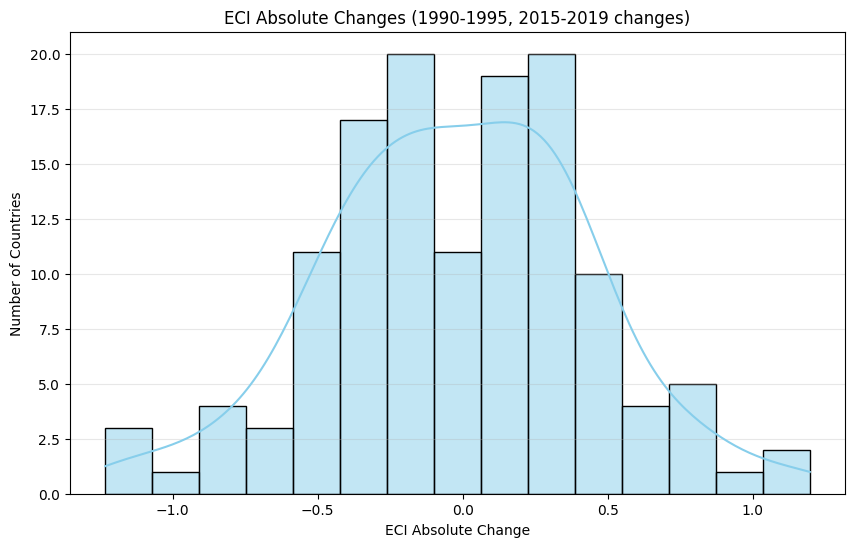

In [ ]:
# --- 1. Histogram of ECI changes ---
plt.figure(figsize=(10,6))
sns.histplot(df_5_change_clusters['Economic Complexity Index'], bins=15, kde=True, color='skyblue')
plt.title('ECI Absolute Changes (1995-2000, 2020-2024 changes)')
plt.xlabel('ECI Absolute Change')
plt.ylabel('Number of Countries')
plt.grid(axis='y', alpha=0.3)
plt.show()

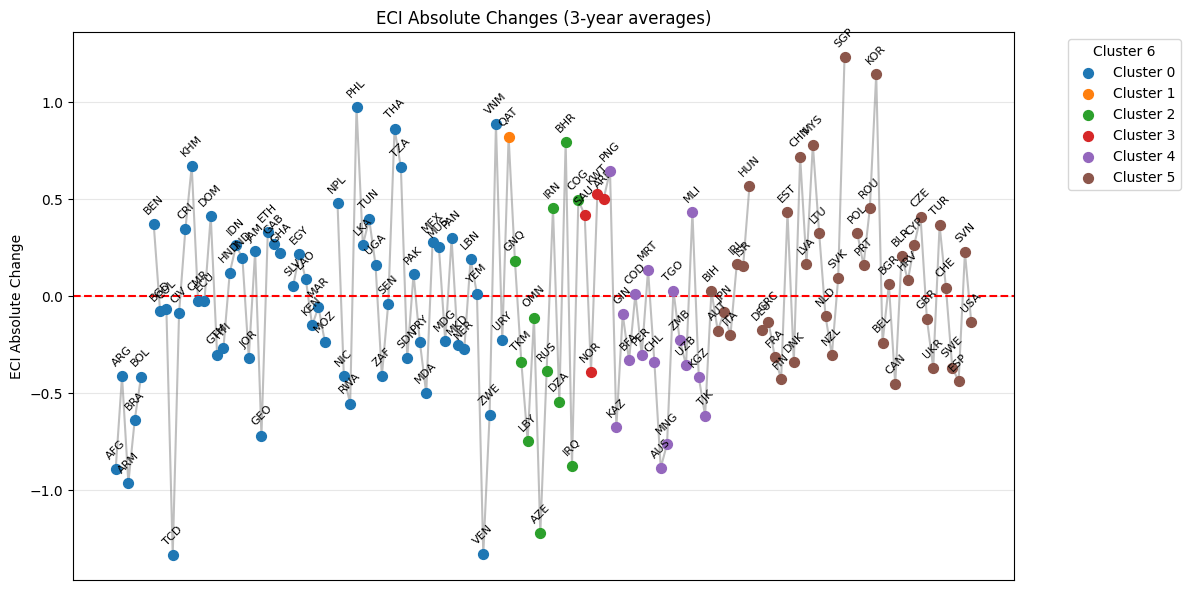

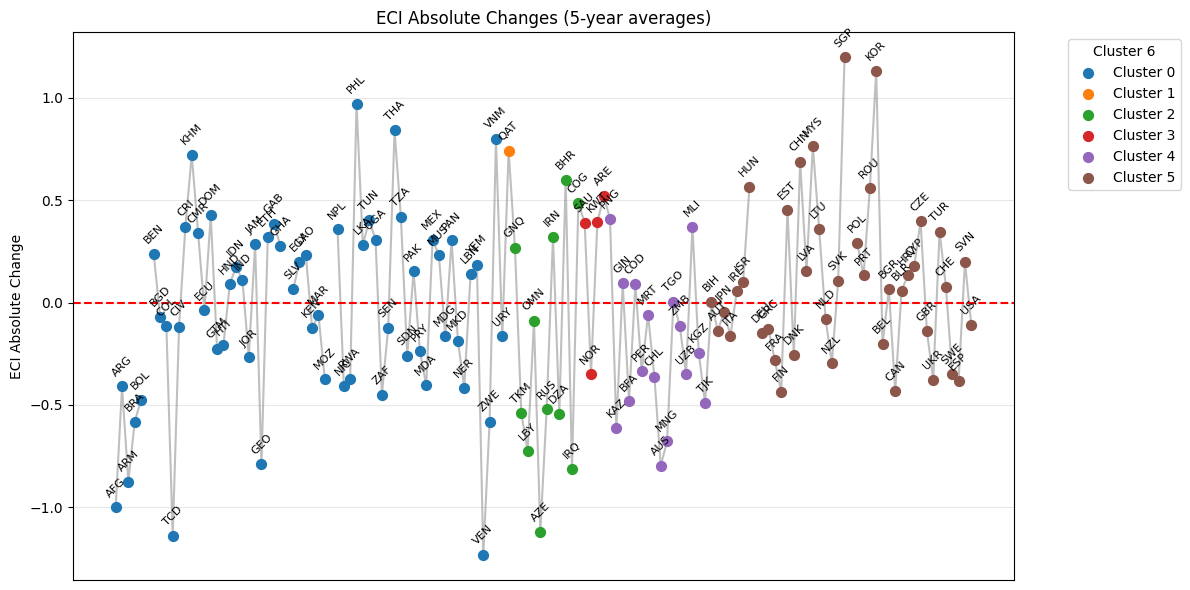

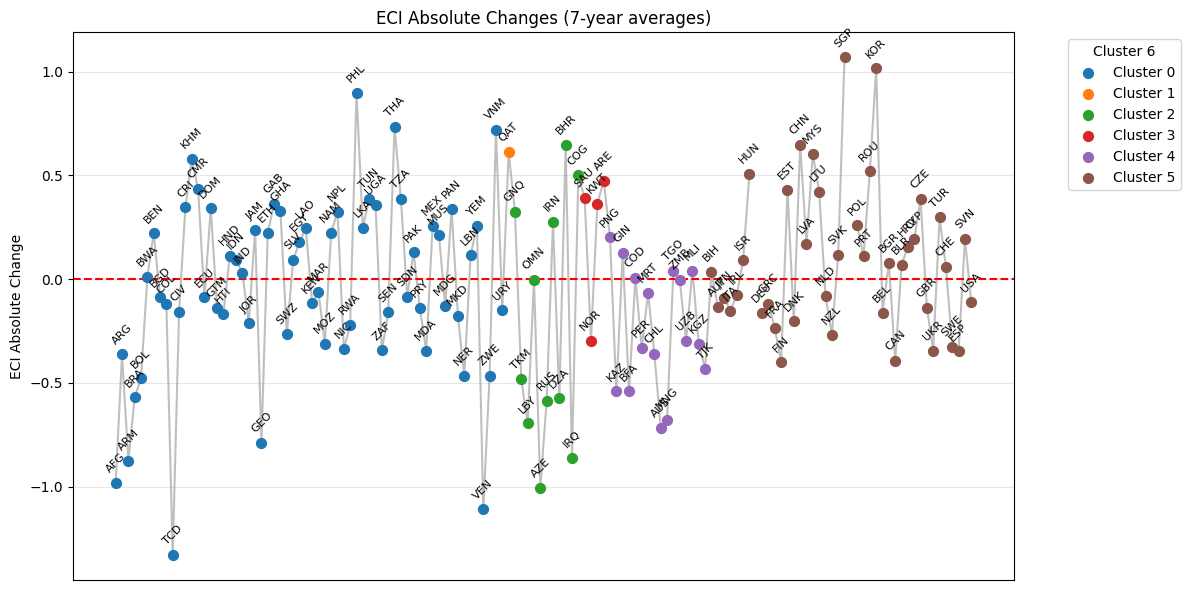

In [370]:
dfs = {
    3: df_3_change_clusters,
    5: df_5_change_clusters,
    7: df_7_change_clusters
}

for k, df in dfs.items():

    df_sorted = df.sort_values('cluster_6').reset_index(drop=True)

    plt.figure(figsize=(12,6))

    unique_clusters = df_sorted['cluster_6'].unique()
    palette = sns.color_palette("tab10", n_colors=len(unique_clusters))
    cluster_colors = dict(zip(unique_clusters, palette))

    # Line
    plt.plot(df_sorted.index, df_sorted['Economic Complexity Index'],
             linestyle='-', color='gray', alpha=0.5)

    # Points + labels
    for cluster in unique_clusters:
        cluster_data = df_sorted[df_sorted['cluster_6'] == cluster]
        plt.scatter(cluster_data.index,
                    cluster_data['Economic Complexity Index'],
                    color=cluster_colors[cluster],
                    s=50,
                    label=f'Cluster {cluster}',
                    zorder=3)

        for i, row in cluster_data.iterrows():
            plt.text(i,
                     row['Economic Complexity Index'] + 0.04,
                     row['Country Code'],
                     ha='center',
                     va='bottom',
                     fontsize=8,
                     rotation=45)

    plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
    plt.xticks([])
    plt.title(f'ECI Absolute Changes ({k}-year averages)')
    plt.ylabel('ECI Absolute Change')
    plt.grid(alpha=0.3)
    plt.legend(title='Cluster 6', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


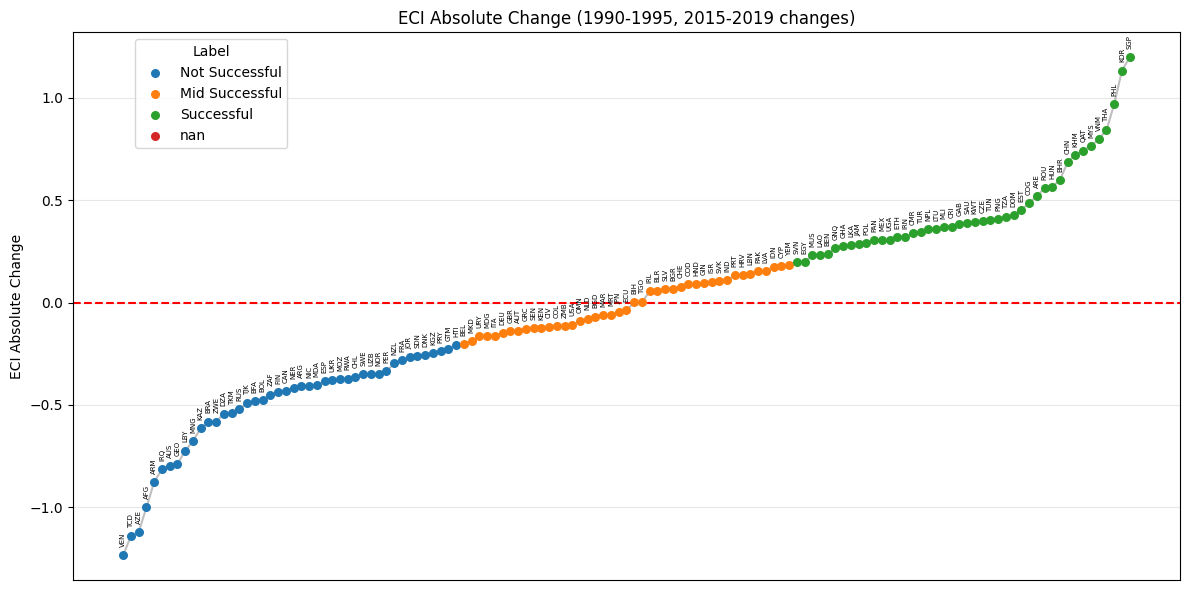

In [371]:
# Sort by ECI change
df_sorted = df_5_change_clusters.sort_values('Economic Complexity Index').reset_index(drop=True)

plt.figure(figsize=(12,6))

# Generate a color palette based on unique clusters
unique_clusters = df_sorted['label'].unique()
palette = sns.color_palette("tab10", n_colors=len(unique_clusters))
cluster_colors = {cluster: color for cluster, color in zip(unique_clusters, palette)}

# Plot line connecting points (gray)
plt.plot(df_sorted.index, df_sorted['Economic Complexity Index'], linestyle='-', color='gray', alpha=0.5)

# Plot points colored by cluster and keep references for legend
scatter_handles = []
for cluster in unique_clusters:
    cluster_data = df_sorted[df_sorted['label'] == cluster]
    sc = plt.scatter(cluster_data.index, cluster_data['Economic Complexity Index'],
                     color=cluster_colors[cluster], s=30, label=f'{cluster}', zorder=3)
    scatter_handles.append(sc)
    # Annotate each point with country code
    for i, row in cluster_data.iterrows():
        plt.text(i, row['Economic Complexity Index'] + 0.04, row['Country Code'], 
                 ha='center', va='bottom', fontsize=5, rotation=90)


# Remove x-axis labels
plt.xticks([])
# Add red dashed horizontal line at 0
plt.axhline(y=0.0, color='red', linestyle='--', linewidth=1.5)
plt.title('ECI Absolute Change (1990-1995, 2015-2019 changes)')
plt.xlabel('')
plt.ylabel('ECI Absolute Change')
plt.grid(alpha=0.3)
plt.legend(title='Label', bbox_to_anchor=(.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## LASSO

In [349]:
df_5_change_clusters.shape

(136, 49)

LASSO coefficients:
 Accountability index                                                                         -0.000000
Adjusted savings: gross savings (% of GNI)                                                   -0.000000
Adjusted savings: natural resources depletion (% of GNI)                                     -0.018716
Adjusted savings: total (current US$)                                                         0.011798
Agriculture                                                                                   0.000000
Capital depreciation rate                                                                    -0.053420
Capital stock (national accounts prices)                                                      0.000000
Clientelism index                                                                            -0.008624
Employment in agriculture (% of total employment)                                            -0.000000
Employment in industry (% of total employment)      

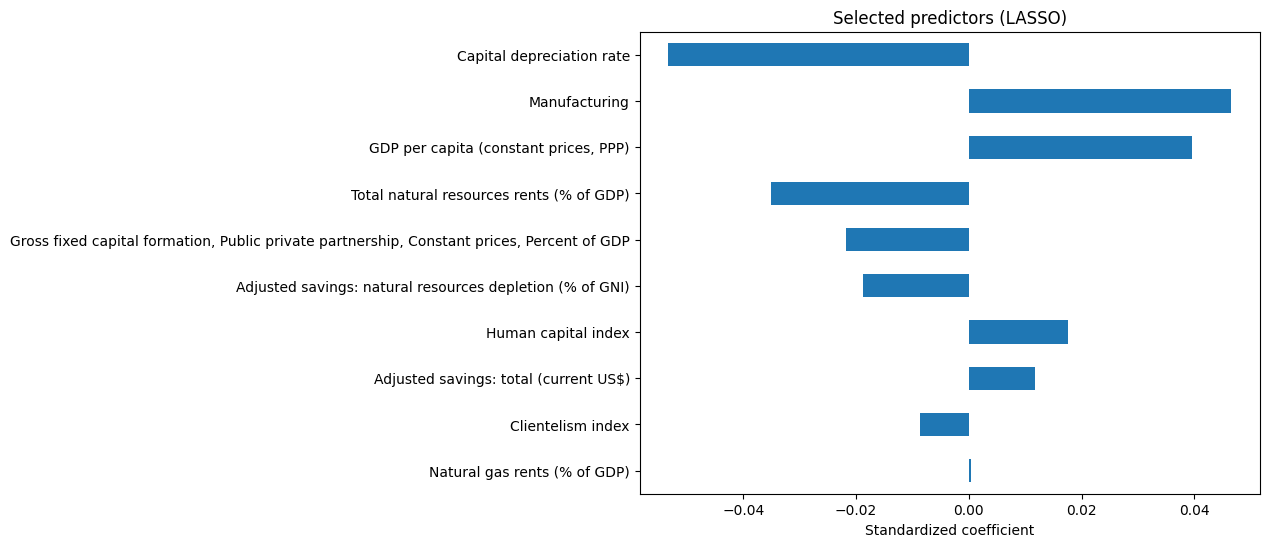

In [ ]:
# ----------------------------
# 1. Drop rows with missing outcome
# ----------------------------
df_clean = df_5_change_clusters.dropna(subset=['Economic Complexity Index']).copy()
df_clean = df_clean.dropna(axis=1, how='all')

# ----------------------------
# 2. Separate outcome and predictors
# ----------------------------
y = df_clean['Economic Complexity Index'].values

X = df_clean.drop(columns=['Country Code', 'Country Name', 'cluster_6', 'Economic Complexity Index', 'label']).values
feature_names = df_clean.drop(columns=['Country Code', 'Country Name', 'cluster_6', 'Economic Complexity Index', 'label']).columns

# ----------------------------
# 3. Impute missing predictor values
# ----------------------------
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# ----------------------------
# 4. Standardize predictors
# ----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# ----------------------------
# 5. LASSO with cross-validation
# ----------------------------
lasso_cv = LassoCV(cv=10, random_state=42, max_iter=10000)
lasso_cv.fit(X_scaled, y)

# ----------------------------
# 6. Extract coefficients (indexed by feature names, not rows!)
# ----------------------------
coef = pd.Series(lasso_cv.coef_, index=feature_names)
print("LASSO coefficients:\n", coef)

# ----------------------------
# 7. Selected predictors (non-zero coefficients)
# ----------------------------
selected = coef[coef != 0].sort_values(key=abs, ascending=False)
print("Selected predictors:\n", selected)

# ----------------------------
# 8. Optional: Plot
# ----------------------------
plt.figure(figsize=(8,6))
selected.plot(kind='barh')
plt.title("Selected predictors (LASSO)")
plt.xlabel("Standardized coefficient")
plt.gca().invert_yaxis()
plt.show()


## Random Forest

Random Forest feature importance:
 Total natural resources rents (% of GDP)                                                      0.158093
GDP per capita (constant prices, PPP)                                                         0.077597
Share of government spending in GDP                                                           0.072495
Clientelism index                                                                             0.058885
Oil rents (% of GDP)                                                                          0.044602
Employment in services (% of total employment)                                                0.044214
Human capital index                                                                           0.042656
Gross fixed capital formation, Public private partnership, Constant prices, Percent of GDP    0.041853
Manufacturing                                                                                 0.034303
Adjusted savings: total (current US$) 

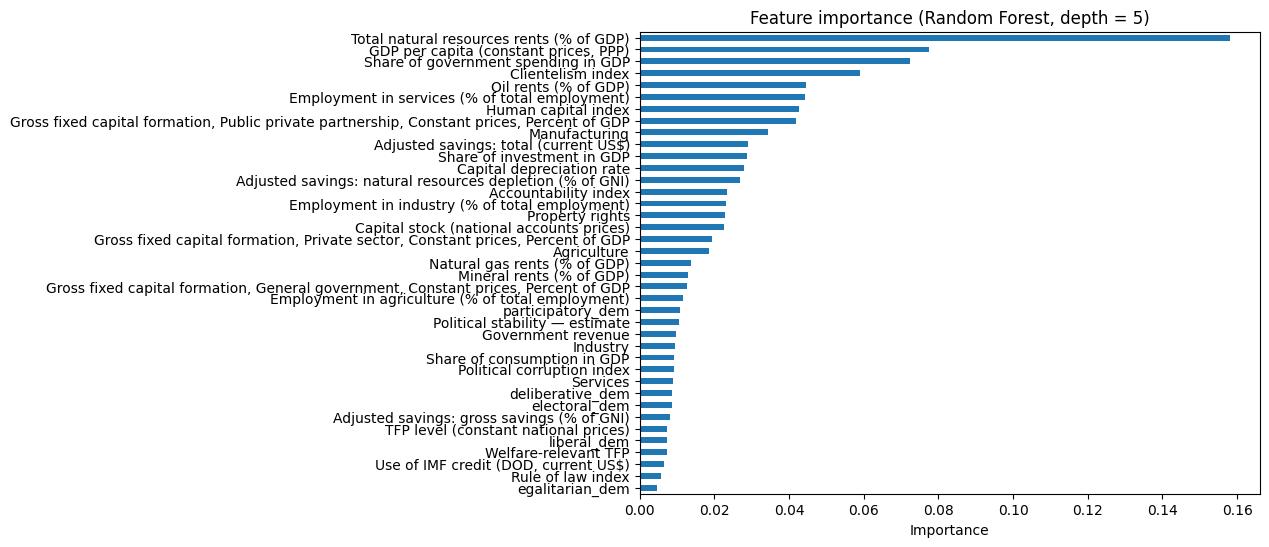

In [354]:
# ----------------------------
# 1. Drop rows with missing outcome
# ----------------------------
df_clean = df_5_change_clusters.dropna(subset=['Economic Complexity Index']).copy()
df_clean = df_clean.dropna(axis=1, how='all')

# ----------------------------
# 2. Separate outcome and predictors
# ----------------------------
y = df_clean['Economic Complexity Index'].values

X_df = df_clean.drop(
    columns=['Country Code', 'Country Name', 'cluster_6',
             'Economic Complexity Index', 'label']
)
feature_names = X_df.columns
X = X_df.values

# ----------------------------
# 3. Impute missing predictor values
# ----------------------------
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# ----------------------------
# 4. Random Forest (5 levels)
# ----------------------------
rf = RandomForestRegressor(
    n_estimators=1000,
    max_depth=5,          # <-- 5 levels
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_imputed, y)

# ----------------------------
# 5. Feature importance (impurity-based)
# ----------------------------
importance = pd.Series(
    rf.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

print("Random Forest feature importance:\n", importance)

# ----------------------------
# 6. Plot importance
# ----------------------------
plt.figure(figsize=(8,6))
importance.plot(kind='barh')
plt.title("Feature importance (Random Forest, depth = 5)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


## Export matrix sophistication

In [296]:
products = pd.read_csv(r"C:\Users\iorueta\PC IGNACIO\0.LSE\MPA DSPP\3. Autumm Term 2025\Capstone Moody's\Capstone\rawdata\hs92_country_product_year_2.csv")

# Inspect
products.head()

,country_id,country_iso3_code,product_id,product_hs92_code,year,export_value,import_value,global_market_share,distance,cog,pci
0,4,AFG,100,1,1995,14517,0,0.000001,0.943,0.001,-0.565
1,4,AFG,100,1,1996,17207,0,0.000002,0.951,0.001,-0.631
2,4,AFG,100,1,1997,22781,0,0.000003,0.938,0.001,-0.519
3,4,AFG,100,1,2000,0,7786,0.000000,0.931,0.001,-0.605
4,4,AFG,100,1,2001,0,15592,0.000000,0.930,0.001,-0.825


In [297]:
YEAR = 2015   # choose a year
products_2015 = products[products['year'] == YEAR].copy()

In [298]:
# Total exports by country
country_totals = products_2015.groupby('country_iso3_code')['export_value'].sum()

# Total exports by product
product_totals = products_2015.groupby('product_id')['export_value'].sum()

# World total exports
world_total = products_2015['export_value'].sum()

# Merge totals
products_2015 = products_2015.merge(country_totals, on='country_iso3_code', suffixes=('', '_country'))
products_2015 = products_2015.merge(product_totals, on='product_id', suffixes=('', '_product'))

# RCA
products_2015['RCA'] = (
    (products_2015['export_value'] / products_2015['export_value_country']) /
    (products_2015['export_value_product'] / world_total)
)


products_2015['M'] = (products_2015['RCA'] >= 1).astype(int)

M = products_2015.pivot_table(
    index='country_iso3_code',
    columns='product_id',
    values='M',
    fill_value=0
)

In [299]:
M

product_id,100,101,102,103,104,105,106,107,108,109,...,187,188,189,190,191,192,193,194,195,196
country_iso3_code,,,,,,,,,,,,,,,,,,,,,
ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AFG,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIA,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
ALB,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
YEM,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZAF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
